# Foruier Series Approximation for discrete time serires

Dependancy:

In [1]:
import numpy as np
from scipy import linalg

Final Code

In [2]:
#the function to calculate the coefficent
def approx(x, y, n, w):
    x = np.matrix(x).transpose()
    y = np.matrix(y).transpose()

    f, b = x.shape
    c, d = y.shape

    if c != f or b != d:
        print('The Input vector have wrong dimension')
        return -1

    j = np.matrix(np.arange(1,n+1))
    V1 = np.cos(w*x*j)
    j = np.matrix(np.arange(n+1,2*n+1))
    V2 = np.sin(w*x*(j-n))

    V = np.concatenate([V1,V2],axis=1)

    Q, R = linalg.qr(V)

    R = R[:2 * n, :2 * n]
    Q = Q[:f, :2 * n]
    # coeff = linalg.solve_triangular(R, (np.dot(Q.transpose(), y)),check_finite=False)
    coeff = linalg.solve_triangular(R, (np.dot(Q.transpose(), y)))

    n = int(len(coeff) / 2)
    mag = np.sqrt(coeff[:n]**2+coeff[n:]**2)
    angle = np.arctan2(coeff[:n],coeff[n:])

    r = []
    for i,(m,a) in enumerate(zip(mag,angle)):
        r.append([float(m),i+1,float(a)])
    return r

#the function to calculate the reconstructed function from the coefficent
def calc_fourier(X,coeff,vmed,w=0.5):
    y = np.zeros_like(X) + vmed
    for (m,i,p) in coeff:
            y += m*np.sin(w*i*X+p)
    return y

#approx a function and get both the coefficent and the reconstructed function
def fourier_approx(funzione,n=0,w=0.5):

    fmean = np.mean(funzione)

    funzione = list(funzione)

    funzione = funzione + funzione[::-1] 

    mean = np.mean(funzione)

    funzione = [z - mean for z in funzione]

    T = np.linspace( 0, 4 * np.pi, num=len(funzione), endpoint=True)
    if n == 0:
        n = int(len(T) / 2) - 1

    if n < 1:
        return -1

    coeff = approx(T, funzione, n, w)

    T =  np.array(T [:int(len(T)/2)])
    funzione =  np.array(funzione [:int(len(funzione)/2)])
    
    y = calc_fourier(T,coeff[:index+1],0)
    
    return y,coeff

# How and Why it work

We start with the foruier series:

### $$f(t) = \frac{a_0}{2} + \sum_{n = 1}^{N} \left [ a_n cos(nwt) + b_n sin(nwt) \right ]$$

we get if we manage to get a function with mean value equal to zero we can simplify to:

### $$f(t) = \sum_{n = 1}^{N} \left [ a_n cos(nwt) + b_n sin(nwt) \right ]$$

### $$ f(t) = \sum_{n = 1}^{N} < \begin{pmatrix}
cos(nwt)
\\ 
sin(nwt)
\end{pmatrix},
\begin{pmatrix}
a_n
\\ 
b_n
\end{pmatrix} >
$$

### $$f(t) = \sum_{n = 1}^{N} \begin{pmatrix}
cos(nwt)
& 
sin(nwt)
\end{pmatrix}
\begin{pmatrix}
a_n
\\ 
b_n
\end{pmatrix}
$$

$$f(t) = \begin{pmatrix}
cos(wt)
&
cos(2wt)
&
...
&
cos((N-1)wt)
& 
sin(wt)
&
sin(2wt)
&
...
&
sin((N-1)wt)
\end{pmatrix}
\begin{pmatrix}
a_1
\\
a_2
\\
...
\\
a_{N-1}
\\ 
b_1
\\
b_2
\\
...
\\
b_{N-1}
\end{pmatrix}
$$

now if we substitute t with the succession $T_k = \{t_k\} $ we get $k$ row forming a matrix $A$ with $k$ row and $2n$ column
and the succession $Y_k(T_k) = {y_k}$ that$ y_k = f(t_k)$ wich form the vector $Y$ 

$$ f(T_k) = \begin{pmatrix}
cos(wt_1)
&
cos(2wt_1)
&
...
&
cos((N-1)wt_1)
& 
sin(wt_1)
&
sin(2wt_1)
&
...
&
sin((N-1)wt_1)
\\
cos(wt_2)
&
cos(2wt_2)
&
...
&
cos((N-1)wt_2)
& 
sin(wt_2)
&
sin(2wt_2)
&
...
&
sin((N-1)wt_2)
\\
...
&
...
&
...
&
...
&
...
&
...
&
...
&
...
\\
cos(wt_K)
&
cos(2wt_K)
&
...
&
cos((N-1)wt_K)
& 
sin(wt_K)
&
sin(2wt_K)
&
...
&
sin((N-1)wt_K)
\end{pmatrix}
\begin{pmatrix}
a_1
\\
a_2
\\
...
\\
a_{N-1}
\\ 
b_1
\\
b_2
\\
...
\\
b_{N-1}
\end{pmatrix}
=
\begin{pmatrix}
y_1
\\
y_2
\\
...
\\
...
\\ 
...
\\
...
\\
...
\\
y_{k}
\end{pmatrix}
$$

so now we have a linear sistem to solve for+the vector of $a_n$ and $ b_n$ called $C$

$$ A C = Y$$

the system to be solvable it have to have $det(A) > 0$

so we have to have more lineary indipendent row than coloumn, so the maximum number of coloumn it can have is when $k = 2n$ if all the row are lineary independent

in the case $ non lineary independent row < 2n$ the sistem is overdeterminated so to solve it we can use the $QR$ decomposition

so that $ A = QR$ so we can compute $$ A = \frac{R}{Q^T Y} $$

and now we have the coefficent of the fourier series ready to be used

There is a possible ottimization if the approximation is computed in preprocessing:
        if we use the geometric identity

### $$ acos(wt) + bsin(wt) = \sqrt{a^2 + b^2} sin(wt + arctan(\frac{b}{a}))$$
 

 and now we can call $c_n = \sqrt{a_n^2 + b_n^2} $ and $\phi_n = arctan(\frac{b_n}{a_n})$

so we have a final series in the form of
### $$ f(t) = \sum_{n = 1}^{N} c_n sin(nwt + \phi_n)$$

# Implementation

we'll import matplotlib to plot the result

In [3]:
import matplotlib.pyplot as plt
from pprint import pprint

we start with f that is a sawthoot wave

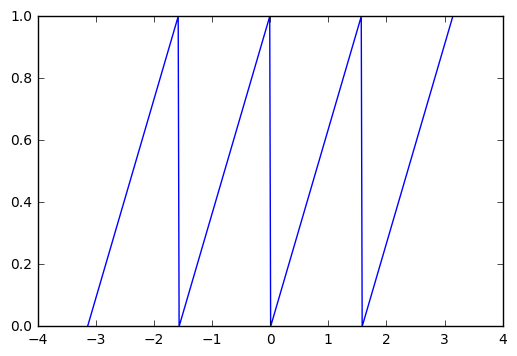

In [4]:
f = np.linspace(0,1,100)
f = np.concatenate((f,f,f,f))

T = np.linspace( 0, 2 * np.pi, num=len(f), endpoint=True) - np.pi

plt.plot(T,f)
plt.show()

we choose the number of armonichs that we want in this case 50 but $ n \in [1,N)$ where $N$ is len(f)

In [5]:
n = 50
w = 1

first we get rid of the mean

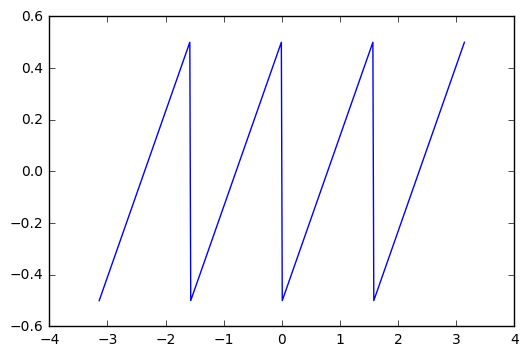

In [6]:
f_mean = np.mean(f)
f -= f_mean

plt.plot(T,f)
plt.show()

we transforme the array into a coloumn vector

In [7]:
x = np.matrix(T).transpose()
y = np.matrix(f).transpose()

we create the C matrix

In [8]:
j = np.matrix(np.arange(1,n+1))
C1 = np.cos(w*x*j)
j = np.matrix(np.arange(n+1,2*n+1))
C2 = np.sin(w*x*(j-n))

C = np.concatenate([C1,C2],axis=1)
print(C)

[[ -1.00000000e+00   1.00000000e+00  -1.00000000e+00 ...,   5.87830464e-15
   -1.66589104e-14  -9.82193362e-16]
 [ -9.99876013e-01   9.99504084e-01  -9.98884304e-01 ...,   6.85923400e-01
   -6.97296801e-01   7.08497291e-01]
 [ -9.99504084e-01   9.98016828e-01  -9.95539708e-01 ...,   9.98256908e-01
   -9.99620307e-01   9.99992251e-01]
 ..., 
 [ -9.99504084e-01   9.98016828e-01  -9.95539708e-01 ...,  -9.98256908e-01
    9.99620307e-01  -9.99992251e-01]
 [ -9.99876013e-01   9.99504084e-01  -9.98884304e-01 ...,  -6.85923400e-01
    6.97296801e-01  -7.08497291e-01]
 [ -1.00000000e+00   1.00000000e+00  -1.00000000e+00 ...,  -5.87830464e-15
    1.66589104e-14   9.82193362e-16]]


the QR decomposition

In [9]:
Q, R = linalg.qr(C)

we truncate the matrix so that it's possible to solve the system

In [10]:
R = R[:2 * n, :2 * n]
Q = Q[:x.shape[0], :2 * n]

we solve the system and get the coeff vector 

In [11]:
coeff = linalg.solve_triangular(R, (np.dot(Q.transpose(), y)))
# coeff = linalg.solve_triangular(R, (np.dot(Q.transpose(), y)),check_finite=False) Alternative way

We separate the matrix into the sin and cos coeff list

In [12]:
n_ = int(len(coeff) / 2)
sin_coeff = coeff[:n_]
cos_coeff = coeff[n_:]

we convert to $c$ and $\phi$ and now we have all the coefficent ready to go

In [13]:
mag = np.sqrt(cos_coeff**2+sin_coeff**2)
phi = np.arctan2(sin_coeff,cos_coeff)

we calculate the result function and re-add the mean to the funciton

In [14]:
y = np.zeros_like(T)
for (m,i,p) in zip(mag,range(n),phi):
        y += m*np.sin(w*(i+1)*T+p)
y += f_mean
f += f_mean

# Result

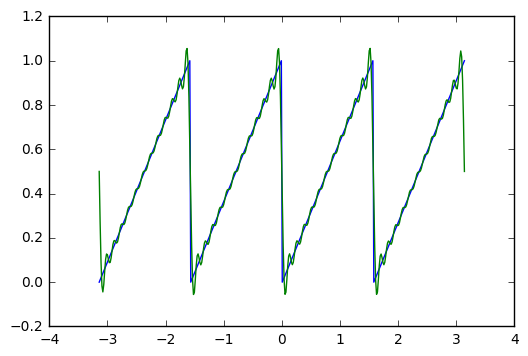

In [15]:
plt.plot(T,f)
plt.plot(T,y)
plt.show()